In [1]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from scipy import optimize
from writeit import rewritePipes

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "../indata/Alamedanewer2.0.inp"
fc = "../indata/Alamedanewer2.0.config"
n0 = PyNetwork(fi,fc,1)
m_per_ft = .3048
elevs  =[417,414,324,300,275,256,232,201,177,190,192,197,199,206,209,240,252,250,283,289,316,315,334,340,334,332,333,341,387,426,417]

In [3]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

In [4]:
#n0.showLayout()
Ls_m = [l*m_per_ft for l in n0.Ls]
elevs_m = [float(el)*m_per_ft for el in elevs]
#elems_m = [el*0. for el in elevs]
Ds_m = [D/12 for D in n0.Ds]
T = n0.T/10
M = n0.M

T = 100
Np = n0.Nedges
a = n0.a[0]
a = 100
Ns = [int(l) for l in Ls_m]
dx = [Ls_m[i]/Ns[i] for i in range(Np)]
print max(dx)
M = int(T*a/(max(dx)*.8))
jt = n0.nodeTypes
Nn = len(jt)
bt = [1]*Nn
bv = [0.]*Nn
r = [1]*Nn
r[0] = 0
bt[0] =1
#bt[17]=1
#bt[19]=-1
#bt[21]=-1
#bt[23]=-1
h0s = [0]*Np
q0s = [0]*Np

1.05545466667


In [5]:
Mrs =[0.007]*Np
#print Ds_m
fn = "../indata/Alameda_m3"
oldinp = "../indata/Alamedanewer2.0.inp"
(fi, fc) = rewritePipes(fn,oldinp, Ns, Ls_m, Mrs, Ds_m, jt, bt, bv, r, h0s, q0s, T, M, a,elevs_m)
n1 = PyNetwork(fi,fc,1)
dt = n1.T/float(n1.M)
P0 = 0
Q00 = 0.0087
A0 = .00793*np.ones(n1.Ns[P0])
#A0 =np.zeros(n1.Ns[P0])
Q0 = Q00*np.ones(n1.Ns[P0])
n1.setIC(P0,A0, Q0)
for i in range(0,Np):
    A0 = 0.00*ones(n1.Ns[i])
    Q0 = 0.*np.ones(n1.Ns[i])
    n1.setIC(i,A0,Q0)
Qb = Q00*np.ones(M+1)
n1.setbVal(0,Qb)
#print dt
print n1.Ds[0]**2*pi/(4)
print n1.Ls
print n1.Ns
print n1.Ds

new files are ../indata/Alameda_m3.inp and ../indata/Alameda_m3.config
0.00785398163397
[ 35.  65.  17.  18.  21.  11.  22.  23.  23.  30.  23.  25.  12.  12.  22.
  33.  31.  17.  27.  21.  30.  22.  37.  12.  17.   6.   6.  78.  39.]
[35 65 17 18 21 11 22 23 23 30 23 25 12 12 22 33 31 17 27 21 30 22 37 12 17
  6  6 78 39]
[ 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
  0.1   0.1   0.1   0.1   0.05  0.1   0.05  0.1   0.05  0.1   0.1   0.05
  0.05  0.05  0.05  0.05  0.05]


In [6]:
%%time
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)
Vf = n1.getTotalVolume()

Vs =[Vf]

CPU times: user 28.2 s, sys: 9.73 ms, total: 28.2 s
Wall time: 28.2 s


In [40]:
print Vs
print V0
print Vf-V0
print Q00*T
Empty=[]
A0s =[]
for j in range(0,Np):
    A0s.append(np.copy(n1.q(j)[0:n1.Ns[j]]))
    if sum(A0s[j])<1e-4:
        Empty.append(j)
print Empty
print A0s[16]

[0.3092233625795807]
0.0
0.30922336258
1.74
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [32]:
%%time
M2 = 1
Ttot = T
for m in range(M2):
    A0s = []
    Q0s = []
    Empty=[]
    for j in range(0,Np):
        A0s.append(np.copy(n1.q(j)[0:n1.Ns[j]]))
        Q0s.append(np.copy(n1.q(j)[n1.Ns[j]:]))
        if sum(A0s[j])<1e-4:
            Empty.append(j)
    #(fi, fc) = rewritePipes(fn,oldinp, Ns, Ls_m, Mrs, Ds_m, jt, bt, bv, r, h0s, q0s, T, M, a,elevs_m)
    n1 = PyNetwork(fi,fc,1)
    for j in range(0,Np):
        A0 = A0s[j]
        Q0 = Q0s[j]
        n1.setIC(j,A0,Q0)
    Qb = Q00*np.ones(M+1)
    n1.setbVal(0,Qb)
    n1.runForwardProblem(dt)
    Vf= n1.getTotalVolume()
    Vs.append(Vf)
    Ttot+=T
    print "T =%f, Volume = %f"%(Ttot,Vf)
    print "Empty Pipes are"
    print Empty

T =20.000000, Volume = 0.230564
Empty Pipes are
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
CPU times: user 3.32 s, sys: 26.6 ms, total: 3.35 s
Wall time: 3.35 s


In [10]:
print A0s[18]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


T = 100.00


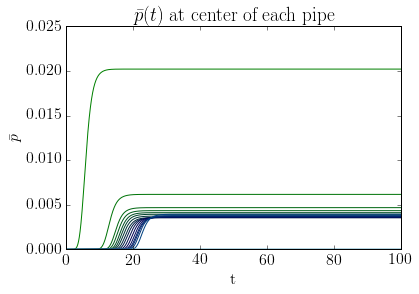

In [13]:
rc('text', usetex=True)        #for tex rendering. 
rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 
                                'monospace': ['Computer Modern Typewriter'], 'size'   : 16})
from matplotlib import cm
import matplotlib.colors as colors
cNorm  = colors.Normalize(vmin=0, vmax=Np+1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean') )
print "T = %.2f"%T
for i in range(0,Np):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
    qf = n1.qhist(i)
    #ah = []
    #print i|
    #for n in range(M+1):
    #    ah.append([qf[idx_t(0,j,n,Ns[i])] for j in range(Ns[i])])
    #print (find(ah<0))
    Nstar = n1.Ns[i]/2
    cval = scalarMap.to_rgba(i)
    Af = (n1.Ds[i]**2)/(pi*4)
    A= [qf[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M+1)];
    H=[p0.pbar(qf[idx_t(0,Nstar,n,n1.Ns[i])],False) for n in range(M+1)]
    t = linspace(0,T,M+1)
    plot(t,H, color = cval,label= "pipe %d"%i)
#legend(loc='upper left')
#ylim(0,1)
xlabel('t')
ylabel(r'$\bar{p}$')
title(r'$\bar{p}(t)$ at center of each pipe')

In [30]:
print n1.getTotalVolume()

0.204500873162


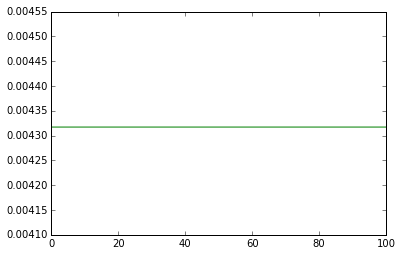

In [29]:

t = linspace(0,T,M+1)
for i in range(0,1):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
    qf = n1.qhist(i)
    Nstar = 0
    cval = scalarMap.to_rgba(i)
    Af = (n0.Ds[i]**2)/(pi*4)
    Q=[qf[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M+1)]
    plot(t,Q, color = cval,label= "pipe %d"%i)
#legend(loc='upper right')
#print H

In [25]:
dx =[n1.Ls[i]/n1.Ns[i] for i in range(Np)]
print max([a*dt/d for d in dx])

0.844451950684


In [18]:
pp = PyPipe_ps(n1.Ns[0],n1.Ds[0],n1.Ls[0],M,a)
print pp.AofH(10,True)
print pp.pbar(0.008,True)


0.00793018096379
18.6738789702


In [27]:
print n1.conn[16]
print n1.nodeTypes[16]

[17 16]
3


0.00785398163397
0.1


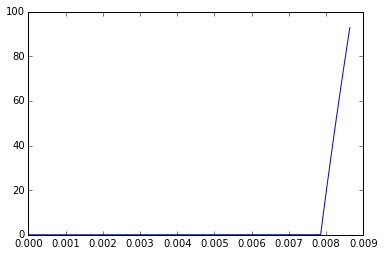

In [21]:
i = 1
p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
Af = (n1.Ds[i]**2)*pi/(4)
As = linspace(0,Af*1.1,100)
pbars= [p0.pbar(A,True) for A in As]
plot(As,pbars)
print Af
print n1.Ds[i]

In [30]:
dV = Vf-V0
print "dV = %f"%(dV)
print V0
print Vf

dV = -0.060104
0.27755
0.217446361768


In [32]:
print A0s[1]
print Q0s[10]

[ 0.0016467   0.00145512  0.0013167   0.00121088  0.00112667  0.00105766
  0.00099979  0.00095037  0.00090754  0.00086996  0.00083665  0.00080686
  0.00078001  0.00075565  0.00073342  0.00071304  0.00069424  0.00067685
  0.0006607   0.00064564  0.00063156  0.00061836  0.00060595  0.00059425
  0.0005832   0.00057275  0.00056283  0.00055341  0.00054444  0.00053589
  0.00052774  0.00051994  0.00051247  0.00050532  0.00049846  0.00049187
  0.00048553  0.00047943  0.00047356  0.00046789  0.00046242  0.00045714
  0.00045203  0.0004471   0.00044232  0.00043768  0.0004332   0.00042884
  0.00042462  0.00042051  0.00041653  0.00041265  0.00040888  0.00040521
  0.00040164  0.00039816  0.00039477  0.00039146  0.00038824  0.00038509
  0.00038202  0.00037902  0.00037609  0.00037323  0.00037043]
[ 0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087
  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087
  0.0087  0.0087  0.0087  0.0087  0.0087]


In [19]:
q = n1.q(18)
print q

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [ ]:
for i in range(0,Np):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
    qf = n1.qhist(i)
    #ah = []
    #print i|
    #for n in range(M+1):
    #    ah.append([qf[idx_t(0,j,n,Ns[i])] for j in range(Ns[i])])
    #print (find(ah<0))
    Nstar = 2
    cval = scalarMap.to_rgba(i)
    Af = (n1.Ds[i]**2)/(pi*4)
    A= [qf[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M+1)];
    H=[p0.pbar(qf[idx_t(0,Nstar,n,n1.Ns[i])],False) for n in range(M+1)]
    t = linspace(0,T,M+1)
    plot(t,H, color = cval,label= "pipe %d"%i)

In [ ]:
qh = n1.qhist(0)
print [qh[idx_t(0,k,0,n1.Ns[i])] for k in range(35)]

In [ ]:
print n1.q(0)[35:]
print n1.q(0)[0:35]

In [64]:
A0s =[]
Q0s = []
A0s.append(np.copy(n1.q(0)[0:n1.Ns[0]]))
Q0s.append(np.copy(n1.q(0)[n1.Ns[0]:]))

35
